In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from itertools import chain, combinations
import statsmodels.api as sm

pd.set_option('display.max_rows', 12)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:20,.2f}'.format)

plt.style.use('seaborn-v0_8')

In [2]:
wage = pd.read_csv('wage.csv', index_col=0)
wage[wage.columns[2:10]] = wage.iloc[:, 2:10].apply(pd.Categorical)
wage

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.32,75.04
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.26,70.48
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.88,130.98
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.04,154.69
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.32,75.04
...,...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.04,154.69
302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.60,99.69
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.19,66.23
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.48,87.98


In [3]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree=5, interaction_only=False, include_bias=False)
polf = pol.fit_transform(wage.loc[:,'age'].values.reshape(-1,1))

wage['age_2'] = polf[:,1]
wage['age_3'] = polf[:,2]
wage['age_4'] = polf[:,3]
wage['age_5'] = polf[:,4]

wage

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,age_2,age_3,age_4,age_5
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.32,75.04,324.00,"5,832.00","104,976.00","1,889,568.00"
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.26,70.48,576.00,"13,824.00","331,776.00","7,962,624.00"
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.88,130.98,"2,025.00","91,125.00","4,100,625.00","184,528,125.00"
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.04,154.69,"1,849.00","79,507.00","3,418,801.00","147,008,443.00"
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.32,75.04,"2,500.00","125,000.00","6,250,000.00","312,500,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.04,154.69,"1,936.00","85,184.00","3,748,096.00","164,916,224.00"
302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.60,99.69,900.00,"27,000.00","810,000.00","24,300,000.00"
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.19,66.23,729.00,"19,683.00","531,441.00","14,348,907.00"
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.48,87.98,729.00,"19,683.00","531,441.00","14,348,907.00"


In [4]:
(wage.wage > 250)

231655    False
86582     False
161300    False
155159    False
11443     False
          ...  
376816    False
302281    False
10033     False
14375     False
453557    False
Name: wage, Length: 3000, dtype: bool

In [5]:
(wage.wage > 250).map({True:1, False:0})

231655    0
86582     0
161300    0
155159    0
11443     0
         ..
376816    0
302281    0
10033     0
14375     0
453557    0
Name: wage, Length: 3000, dtype: int64

In [6]:
wage['wage_250'] = (wage.wage > 250).map({True:1, False:0})

X = wage.loc[:, ['age', 'age_2', 'age_3', 'age_4']]
y = wage.wage
wage

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,age_2,age_3,age_4,age_5,wage_250
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.32,75.04,324.00,"5,832.00","104,976.00","1,889,568.00",0
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.26,70.48,576.00,"13,824.00","331,776.00","7,962,624.00",0
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.88,130.98,"2,025.00","91,125.00","4,100,625.00","184,528,125.00",0
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.04,154.69,"1,849.00","79,507.00","3,418,801.00","147,008,443.00",0
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.32,75.04,"2,500.00","125,000.00","6,250,000.00","312,500,000.00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.04,154.69,"1,936.00","85,184.00","3,748,096.00","164,916,224.00",0
302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.60,99.69,900.00,"27,000.00","810,000.00","24,300,000.00",0
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.19,66.23,729.00,"19,683.00","531,441.00","14,348,907.00",0
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.48,87.98,729.00,"19,683.00","531,441.00","14,348,907.00",0


In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-184.1541797753182,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

<AxesSubplot: xlabel='age', ylabel='wage'>

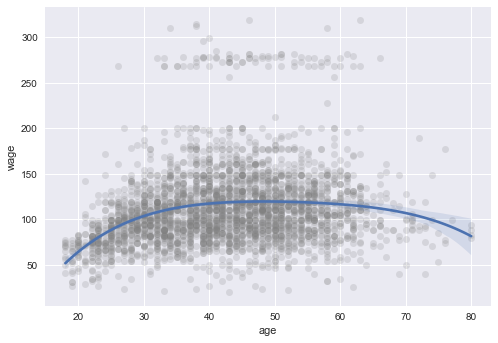

In [8]:
sns.regplot(x='age', y='wage', data=wage, order=4, scatter_kws={'alpha':0.2, 'color': 'gray'})

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=True, C=1e9)
log_reg.fit(X, wage.wage_250)

log_reg.intercept_, log_reg.coef_

(array([-5.64988331e-05]),
 array([[-1.12834464e-03, -1.60767948e-02,  5.10936166e-04,
         -4.28422976e-06]]))

In [10]:
from statsmodels.formula.api import glm

lr_sm = glm(formula='wage_250 ~ age + age_2 + age_3 + age_4', data=wage, family=sm.families.Binomial()).fit()

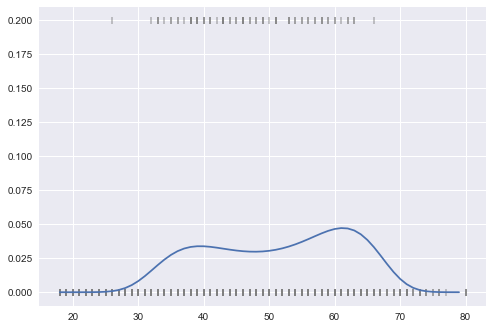

In [11]:
age_grid = np.arange(wage.age.min(), wage.age.max()).reshape(-1,1)

X_test = pd.DataFrame(PolynomialFeatures(4, include_bias=True).fit_transform(age_grid), columns=['Intercept', 'age', 'age_2', 'age_3', 'age_4'])

log_reg_pred = lr_sm.predict(X_test)

plt.scatter(wage.age, wage.wage_250/5, marker='|', color='gray', alpha=0.5)
plt.plot(age_grid, log_reg_pred)

In [12]:
age_step, bins = pd.cut(wage.age, 4, retbins=True, right=True)
bins

array([17.938, 33.5  , 49.   , 64.5  , 80.   ])

In [13]:
wage_step = pd.concat([wage.age, age_step, wage.wage, wage.wage_250], keys=['age', 'age_step', 'wage', 'wage_250'], axis=1)
wage_step

,age,age_step,wage,wage_250
231655,18,"(17.938, 33.5]",75.04,0
86582,24,"(17.938, 33.5]",70.48,0
161300,45,"(33.5, 49.0]",130.98,0
155159,43,"(33.5, 49.0]",154.69,0
11443,50,"(49.0, 64.5]",75.04,0
...,...,...,...,...
376816,44,"(33.5, 49.0]",154.69,0
302281,30,"(17.938, 33.5]",99.69,0
10033,27,"(17.938, 33.5]",66.23,0
14375,27,"(17.938, 33.5]",87.98,0


In [14]:
X = pd.get_dummies(wage_step.age_step)
X = X.drop(X.columns[0], axis=1)
y = wage_step.wage

lr_step = LinearRegression(fit_intercept=True)

lr_step.fit(X, y)
lr_step.intercept_, lr_step.coef_

(94.15839203351902, array([24.05349138, 23.664559  ,  7.6405917 ]))

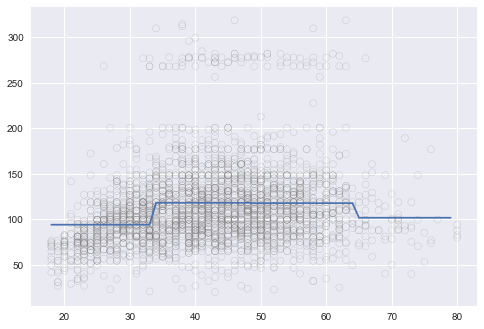

In [15]:
age_grid_bins = np.digitize(age_grid.ravel(), bins)

X_test = pd.get_dummies(age_grid_bins).drop(1, axis=1)

lin_pred = lr_step.predict(X_test)

plt.scatter(wage_step.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolors='None')
plt.plot(age_grid, lin_pred)

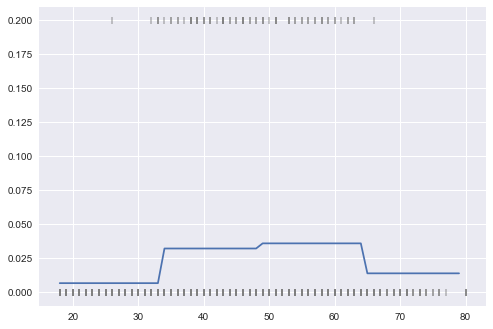

In [16]:
from statsmodels.api import GLM

lr_sm = GLM(wage_step.wage_250, sm.add_constant(X), family=sm.families.Binomial()).fit()

log_pred = lr_sm.predict(sm.add_constant(X_test))

plt.scatter(wage_step.age, wage_step.wage_250/5, marker='|', color='gray', alpha=0.5)
plt.plot(age_grid, log_pred)

# Spline

In [18]:
from patsy import dmatrix

age_spline1 = dmatrix('bs(age, knots=(25,40,60), degree=3, include_intercept=False)', data=wage, return_type='dataframe')

age_spline1

,Intercept,"bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
231655,1.00,0.00,0.00,0.00,0.00,0.00,0.00
86582,1.00,0.56,0.40,0.03,0.00,0.00,0.00
161300,1.00,0.00,0.11,0.62,0.26,0.00,0.00
155159,1.00,0.00,0.17,0.63,0.20,0.00,0.00
11443,1.00,0.00,0.03,0.51,0.43,0.03,0.00
...,...,...,...,...,...,...,...
376816,1.00,0.00,0.14,0.63,0.23,0.00,0.00
302281,1.00,0.14,0.63,0.23,0.00,0.00,0.00
10033,1.00,0.30,0.59,0.11,0.00,0.00,0.00
14375,1.00,0.30,0.59,0.11,0.00,0.00,0.00


In [20]:
age_grid_spline1 = dmatrix('bs(age, knots=(25,40,60), degree=3, include_intercept=False)', {'age':age_grid}, return_type='dataframe')
age_grid_spline1

,Intercept,"bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.35,0.02,0.00,0.00,0.00,0.00
2,1.00,0.57,0.07,0.00,0.00,0.00,0.00
3,1.00,0.67,0.14,0.00,0.00,0.00,0.00
4,1.00,0.69,0.22,0.01,0.00,0.00,0.00
...,...,...,...,...,...,...,...
57,1.00,0.00,0.00,0.00,0.06,0.45,0.49
58,1.00,0.00,0.00,0.00,0.03,0.37,0.60
59,1.00,0.00,0.00,0.00,0.02,0.27,0.72
60,1.00,0.00,0.00,0.00,0.00,0.15,0.85


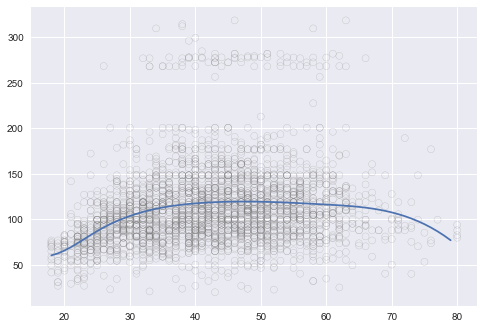

In [21]:
spline_reg1 = LinearRegression(fit_intercept=False)
spline_reg1.fit(age_spline1, wage.wage)

spline_pred1 = spline_reg1.predict(age_grid_spline1)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolors='None')
plt.plot(age_grid, spline_pred1)

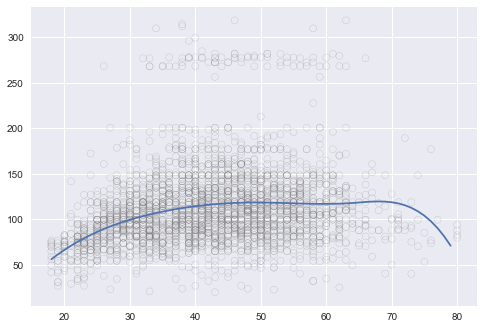

In [22]:
age_spline2 = dmatrix('bs(age, df=6, include_intercept=False)', data=wage, return_type='dataframe')

age_grid_spline2 = dmatrix('bs(age, df=6, include_intercept=False)', {'age':age_grid}, return_type='dataframe')

spline_reg2 = LinearRegression(fit_intercept=False)
spline_reg2.fit(age_spline2, wage.wage)

spline_pred2 = spline_reg2.predict(age_grid_spline2)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolors='None')
plt.plot(age_grid, spline_pred2)

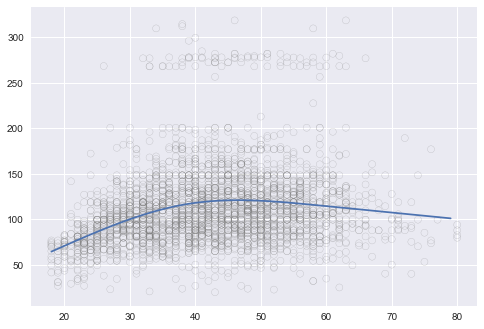

In [23]:
age_spline3 = dmatrix('cr(age, df=4)', data=wage, return_type='dataframe')

age_grid_spline3 = dmatrix('cr(age, df=4)', {'age':age_grid}, return_type='dataframe')

spline_reg3 = LinearRegression(fit_intercept=False)
spline_reg3.fit(age_spline3, wage.wage)

spline_pred3 = spline_reg3.predict(age_grid_spline3)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolors='None')
plt.plot(age_grid, spline_pred3)

# GAM

In [24]:
year_sp1 = dmatrix('cr(year, df=4)', data=wage, return_type='dataframe').drop('Intercept', axis=1)

age_sp1 = dmatrix('cr(age, df=5)', data=wage, return_type='dataframe').drop('Intercept', axis=1)

edu_gam = pd.get_dummies(wage.education).iloc[:, 1:]

wage_gam = pd.concat([wage.wage, year_sp1, age_sp1, edu_gam], axis=1)

X = wage_gam.iloc[:, 1:14]
y = wage_gam.wage

gam = LinearRegression(fit_intercept=True)
gam.fit(X, y)

gam.intercept_, gam.coef_

(818920885204862.2,
 array([-1.86228365e+14, -1.86228365e+14, -1.86228365e+14, -1.86228365e+14,
        -6.32692521e+14, -6.32692521e+14, -6.32692521e+14, -6.32692521e+14,
        -6.32692521e+14,  1.05498047e+01,  2.31723633e+01,  3.76655273e+01,
         6.22158203e+01]))